<a href="https://colab.research.google.com/github/Sujoy-004/Chat-Analyzer-Pro/blob/main/notebooks/03_sentiment_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cell 1 : verify environment and available data

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from pathlib import Path

In [2]:
try:
    # Try to load your processed data
    df = pd.read_csv('https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/data/processed/example_parsed.csv')
    print("‚úÖ Successfully loaded your processed chat data!")
    print(f"Data shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print()
    print("Sample data:")
    print(df.head(3).to_string())
    print()
    print("Data types:")
    print(df.dtypes)
    print()

except Exception as e:
    print(f"‚ùå Error loading data: {e}")

‚úÖ Successfully loaded your processed chat data!
Data shape: (27, 7)
Columns: ['datetime', 'sender', 'message', 'date', 'time', 'hour', 'message_length']

Sample data:
              datetime sender                                                                    message        date      time  hour  message_length
0  2023-12-25 09:30:00  Alice                                                        Merry Christmas! üéÑüéÖ  2023-12-25  09:30:00     9              19
1  2023-12-25 09:32:00    Bob                 Merry Christmas to you too! Hope you're having a great day  2023-12-25  09:32:00     9              58
2  2023-12-25 09:35:00  Alice  Thanks! Opening presents with family right now Family time is the best ‚ù§Ô∏è  2023-12-25  09:35:00     9              73

Data types:
datetime          object
sender            object
message           object
date              object
time              object
hour               int64
message_length     int64
dtype: object



In [3]:
# Check for VADER
try:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    print("‚úÖ VADER Sentiment is available")
    vader_available = True
except ImportError:
    print("‚ùå VADER Sentiment not installed")
    vader_available = False

‚ùå VADER Sentiment not installed


In [4]:
# Check for TextBlob
try:
    from textblob import TextBlob
    print("‚úÖ TextBlob is available")
    textblob_available = True
except ImportError:
    print("‚ùå TextBlob not installed")
    textblob_available = False

‚úÖ TextBlob is available


In [5]:
# Check for transformers (HuggingFace)
try:
    from transformers import pipeline
    print("‚úÖ Transformers (HuggingFace) is available")
    transformers_available = True
except ImportError:
    print("‚ùå Transformers not installed")
    transformers_available = False

‚úÖ Transformers (HuggingFace) is available


In [6]:
# Check for matplotlib and seaborn for visualization
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("‚úÖ Matplotlib and Seaborn available")
    viz_available = True
except ImportError:
    print("‚ùå Visualization libraries not available")
    viz_available = False

‚úÖ Matplotlib and Seaborn available


## Cell 2: Install VADER and Import Required Libraries

In [7]:
print("Installing VADER Sentiment...")
!pip install vaderSentiment
print("‚úÖ VADER Sentiment installed")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Installing VADER Sentiment...
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.0/126.0 kB 3.7 MB/s eta 0:00:00
‚úÖ VADER Sentiment installed


In [8]:
# Test VADER
try:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    vader_analyzer = SentimentIntensityAnalyzer()
    test_text = "I love this amazing day!"
    vader_result = vader_analyzer.polarity_scores(test_text)
    print("‚úÖ VADER working:", vader_result)
except Exception as e:
    print(f"‚ùå VADER error: {e}")

‚úÖ VADER working: {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.8748}


In [9]:
# Test TextBlob
try:
    from textblob import TextBlob
    blob = TextBlob(test_text)
    print("‚úÖ TextBlob working - Polarity:", blob.sentiment.polarity, "Subjectivity:", blob.sentiment.subjectivity)
except Exception as e:
    print(f"‚ùå TextBlob error: {e}")

‚úÖ TextBlob working - Polarity: 0.625 Subjectivity: 0.75


In [10]:
# Test Transformers (HuggingFace) - this will take time to download
try:
    from transformers import pipeline
    # We'll use a lightweight model for sentiment
    print("‚úÖ Loading HuggingFace sentiment pipeline...")
    hf_analyzer = pipeline("sentiment-analysis",
                          model="cardiffnlp/twitter-roberta-base-sentiment-latest",
                          return_all_scores=True)
    hf_result = hf_analyzer(test_text)
    print("‚úÖ HuggingFace working:", hf_result)
except Exception as e:
    print(f"‚ùå HuggingFace error: {e}")
    print("Trying alternative model...")
    try:
        hf_analyzer = pipeline("sentiment-analysis", return_all_scores=True)
        hf_result = hf_analyzer(test_text)
        print("‚úÖ HuggingFace (default) working:", hf_result)
    except Exception as e2:
        print(f"‚ùå HuggingFace (default) error: {e2}")

‚úÖ Loading HuggingFace sentiment pipeline...


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


‚úÖ HuggingFace working: [[{'label': 'negative', 'score': 0.007204313296824694}, {'label': 'neutral', 'score': 0.009917495772242546}, {'label': 'positive', 'score': 0.9828782081604004}]]


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/data/processed/example_parsed.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

print(f"\nüìä Analyzing {len(df)} messages from {df['sender'].unique()}")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")


üìä Analyzing 27 messages from ['Alice' 'Bob']
Date range: 2023-12-25 09:30:00 to 2023-12-27 08:15:00


##  Cell 3: Sentiment Analysis Functions

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [13]:
print("üì• Downloading sentiment.py from your repository...")
import requests

# Load the sentiment analysis module from GitHub
sentiment_code = requests.get('https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/src/analysis/sentiment.py').text

# Execute the code in the global scope to make functions accessible
exec(sentiment_code, globals())

üì• Downloading sentiment.py from your repository...
üìä Sentiment Analysis Module - Chat Analyzer Pro
This module provides comprehensive sentiment analysis for chat data
Usage: import sentiment; sentiment.quick_sentiment_analysis(df)


In [14]:
print("‚úÖ sentiment.py module loaded successfully!")
print("üîß Available functions:")
print("  ‚úÖ analyze_vader()")
print("  ‚úÖ analyze_textblob()")
print("  ‚úÖ analyze_huggingface()")
print("  ‚úÖ add_sentiment_analysis()")
print("  ‚úÖ get_sentiment_summary()")
print("  ‚úÖ plot_sentiment_analysis()")
print("  ‚úÖ find_extreme_messages()")
print("  ‚úÖ quick_sentiment_analysis()")
print("  ‚úÖ initialize_analyzers()")

‚úÖ sentiment.py module loaded successfully!
üîß Available functions:
  ‚úÖ analyze_vader()
  ‚úÖ analyze_textblob()
  ‚úÖ analyze_huggingface()
  ‚úÖ add_sentiment_analysis()
  ‚úÖ get_sentiment_summary()
  ‚úÖ plot_sentiment_analysis()
  ‚úÖ find_extreme_messages()
  ‚úÖ quick_sentiment_analysis()
  ‚úÖ initialize_analyzers()


In [15]:
# Load your test data
df = pd.read_csv('https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/data/processed/example_parsed.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

print(f"\nüìä Testing on {len(df)} messages from {df['sender'].unique()}")

# Initialize analyzers first before testing individual functions
print("\nüîß Initializing analyzers for individual function testing...")
initialize_analyzers()


üìä Testing on 27 messages from ['Alice' 'Bob']

üîß Initializing analyzers for individual function testing...
üöÄ Initializing Sentiment Analyzers...
‚úÖ VADER analyzer loaded


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


‚úÖ HuggingFace analyzer loaded
üéØ Sentiment analyzers ready!


In [16]:
sample_messages = [
    "Merry Christmas! üéÑüéÖ",
    "That sounds wonderful! I'm cooking dinner for everyone today",
    "<Media omitted>",
    "Thanks for sharing your day with me üòä",
    "Good morning! How was your evening?"
]

In [17]:
for i, msg in enumerate(sample_messages, 1):
    print(f"\nüìù Message {i}: '{msg}'")

    # Test VADER
    vader_result = analyze_vader(msg)
    print(f"  üîµ VADER: {vader_result['compound']:.3f} ({categorize_sentiment(vader_result['compound'])})")
    print(f"      Details: pos={vader_result['pos']:.3f}, neu={vader_result['neu']:.3f}, neg={vader_result['neg']:.3f}")

    # Test TextBlob
    tb_result = analyze_textblob(msg)
    print(f"  üü† TextBlob: {tb_result['polarity']:.3f} ({categorize_sentiment(tb_result['polarity'])})")
    print(f"      Subjectivity: {tb_result['subjectivity']:.3f}")

    # Test HuggingFace
    hf_result = analyze_huggingface(msg)
    dominant = max(hf_result, key=hf_result.get)
    print(f"  üü¢ HuggingFace: {dominant} (confidence: {hf_result[dominant]:.3f})")
    print(f"      All scores: {hf_result}")


üìù Message 1: 'Merry Christmas! üéÑüéÖ'
  üîµ VADER: 0.585 (Positive)
      Details: pos=0.431, neu=0.569, neg=0.000
  üü† TextBlob: 0.000 (Neutral)
      Subjectivity: 0.000
  üü¢ HuggingFace: positive (confidence: 0.968)
      All scores: {'positive': 0.9682372212409973, 'negative': 0.004698131233453751, 'neutral': 0.027064576745033264}

üìù Message 2: 'That sounds wonderful! I'm cooking dinner for everyone today'
  üîµ VADER: 0.611 (Positive)
      Details: pos=0.333, neu=0.667, neg=0.000
  üü† TextBlob: 1.000 (Positive)
      Subjectivity: 1.000
  üü¢ HuggingFace: positive (confidence: 0.989)
      All scores: {'positive': 0.9893565773963928, 'negative': 0.00198520184494555, 'neutral': 0.00865818839520216}

üìù Message 3: '<Media omitted>'
  üîµ VADER: 0.000 (Neutral)
      Details: pos=0.000, neu=1.000, neg=0.000
  üü† TextBlob: 0.000 (Neutral)
      Subjectivity: 0.000
  üü¢ HuggingFace: neutral (confidence: 0.656)
      All scores: {'positive': 0.0309944879263639

In [18]:
# Test the main analysis function on a small subset
print("Testing add_sentiment_analysis() on first 5 messages...")
test_df = df.head(5).copy()
test_df_analyzed = add_sentiment_analysis(test_df, initialize_first=True)

print(f"\nüìä Results Summary:")
print(f"  Original columns: {len(test_df.columns)}")
print(f"  After analysis: {len(test_df_analyzed.columns)}")
print(f"  New columns added: {len(test_df_analyzed.columns) - len(test_df.columns)}")

Testing add_sentiment_analysis() on first 5 messages...
üöÄ Initializing Sentiment Analyzers...
‚úÖ VADER analyzer loaded


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


‚úÖ HuggingFace analyzer loaded
üéØ Sentiment analyzers ready!
üîç Analyzing sentiment for 5 messages...
Running VADER analysis...
Running TextBlob analysis...
Running HuggingFace analysis...
‚úÖ Sentiment analysis complete!

üìä Results Summary:
  Original columns: 7
  After analysis: 20
  New columns added: 13


In [19]:
# Show the new columns
new_columns = [col for col in test_df_analyzed.columns if col not in test_df.columns]
print(f"\n‚úÖ New sentiment columns:")
for col in new_columns:
    print(f"    - {col}")


‚úÖ New sentiment columns:
    - vader_compound
    - vader_pos
    - vader_neu
    - vader_neg
    - vader_sentiment
    - textblob_polarity
    - textblob_subjectivity
    - textblob_sentiment
    - hf_positive
    - hf_negative
    - hf_neutral
    - hf_sentiment
    - consensus_sentiment


In [20]:
# Test summary function
print(f"\nüìù Testing get_sentiment_summary()...")
summary = get_sentiment_summary(test_df_analyzed)
print(f"  Summary keys: {list(summary.keys())}")
print(f"  Sentiment distribution: {summary.get('sentiment_distribution', 'N/A')}")


üìù Testing get_sentiment_summary()...
  Summary keys: ['total_messages', 'sentiment_distribution', 'average_scores', 'by_sender', 'temporal_analysis']
  Sentiment distribution: {'Positive': 4, 'Neutral': 1}


In [21]:
# Test extreme messages function
print(f"\nüé≠ Testing find_extreme_messages()...")
extremes = find_extreme_messages(test_df_analyzed, n=2)
print(f"  Found {len(extremes['most_positive'])} most positive messages")
print(f"  Found {len(extremes['most_negative'])} most negative messages")


üé≠ Testing find_extreme_messages()...
  Found 2 most positive messages
  Found 2 most negative messages


## Cell 4: Full Sentiment Analysis and Visualization

In [22]:
import requests
sentiment_code = requests.get('https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/src/analysis/sentiment.py').text
exec(sentiment_code, globals())

print("‚úÖ sentiment.py module loaded successfully!")

üìä Sentiment Analysis Module - Chat Analyzer Pro
This module provides comprehensive sentiment analysis for chat data
Usage: import sentiment; sentiment.quick_sentiment_analysis(df)
‚úÖ sentiment.py module loaded successfully!


In [23]:
# Load your data
df = pd.read_csv('https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/data/processed/example_parsed.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

print(f"üìä Analyzing {len(df)} messages from {df['sender'].unique()}")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")

üìä Analyzing 27 messages from ['Alice' 'Bob']
Date range: 2023-12-25 09:30:00 to 2023-12-27 08:15:00


üöÄ Initializing Sentiment Analyzers...
‚úÖ VADER analyzer loaded


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


‚úÖ HuggingFace analyzer loaded
üéØ Sentiment analyzers ready!
üîç Analyzing sentiment for 27 messages...
Running VADER analysis...
Running TextBlob analysis...
Running HuggingFace analysis...
‚úÖ Sentiment analysis complete!


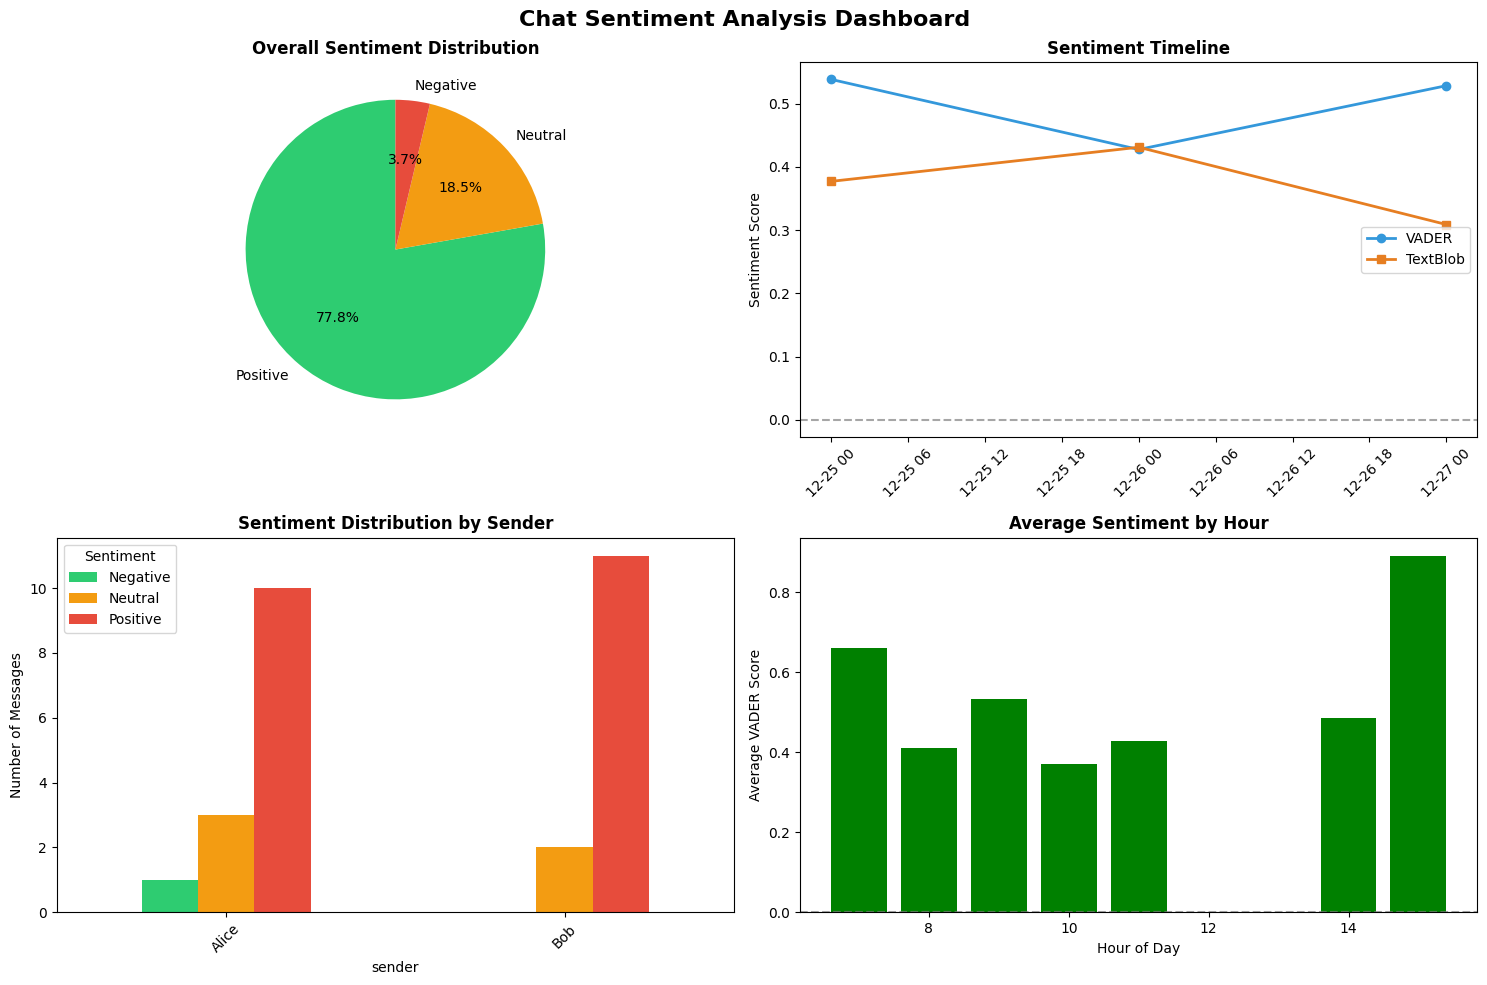


üìà SENTIMENT ANALYSIS RESULTS
Total Messages: 27

üé≠ Overall Sentiment Distribution:
  Positive: 21 messages (77.8%)
  Neutral: 5 messages (18.5%)
  Negative: 1 messages (3.7%)

üìä Average Sentiment Scores:
  vader_compound: 0.504 (min: 0.000, max: 0.929)
  textblob_polarity: 0.378 (min: -0.150, max: 1.000)

üë• Sentiment by Sender:
  Alice:
    Messages: 14
    Avg vader_compound: 0.425
    Avg textblob_polarity: 0.204
    Positive: 10 (71.4%)
    Neutral: 3 (21.4%)
    Negative: 1 (7.1%)

  Bob:
    Messages: 13
    Avg vader_compound: 0.588
    Avg textblob_polarity: 0.566
    Positive: 11 (84.6%)
    Neutral: 2 (15.4%)



In [24]:
df_with_sentiment, summary = quick_sentiment_analysis(df, plot=True)

print("\n" + "="*60)
print("üìà SENTIMENT ANALYSIS RESULTS")
print("="*60)

print(f"Total Messages: {summary['total_messages']}")
print(f"\nüé≠ Overall Sentiment Distribution:")
for sentiment, count in summary['sentiment_distribution'].items():
    percentage = (count / summary['total_messages']) * 100
    print(f"  {sentiment}: {count} messages ({percentage:.1f}%)")

print(f"\nüìä Average Sentiment Scores:")
for score_type, scores in summary['average_scores'].items():
    print(f"  {score_type}: {scores['mean']:.3f} (min: {scores['min']:.3f}, max: {scores['max']:.3f})")

print(f"\nüë• Sentiment by Sender:")
for sender, data in summary['by_sender'].items():
    print(f"  {sender}:")
    print(f"    Messages: {data['message_count']}")
    for score_type, avg_score in data['avg_scores'].items():
        print(f"    Avg {score_type}: {avg_score:.3f}")
    sentiment_dist = data['sentiment_distribution']
    for sent, count in sentiment_dist.items():
        pct = (count / data['message_count']) * 100
        print(f"    {sent}: {count} ({pct:.1f}%)")
    print()

In [25]:
extreme_messages = find_extreme_messages(df_with_sentiment, n=2)

print("\n" + "="*60)
print("üîç EXTREME MESSAGES ANALYSIS")
print("="*60)

print("üü¢ MOST POSITIVE MESSAGES:")
for i, msg_data in enumerate(extreme_messages['most_positive'], 1):
    print(f"  {i}. Sender: {msg_data['sender']}")
    print(f"     Message: '{msg_data['message']}'")
    print(f"     VADER Score: {msg_data['vader_score']:.3f}")
    print(f"     Sentiment: {msg_data['sentiment']}")
    print()

print("üî¥ MOST NEGATIVE MESSAGES:")
for i, msg_data in enumerate(extreme_messages['most_negative'], 1):
    print(f"  {i}. Sender: {msg_data['sender']}")
    print(f"     Message: '{msg_data['message']}'")
    print(f"     VADER Score: {msg_data['vader_score']:.3f}")
    print(f"     Sentiment: {msg_data['sentiment']}")
    print()


üîç EXTREME MESSAGES ANALYSIS
üü¢ MOST POSITIVE MESSAGES:
  1. Sender: Alice
     Message: 'It definitely will be! Thanks for sharing your day with me üòä'
     VADER Score: 0.929
     Sentiment: Positive

  2. Sender: Bob
     Message: 'Merry Christmas to you too! Hope you're having a great day'
     VADER Score: 0.895
     Sentiment: Positive

üî¥ MOST NEGATIVE MESSAGES:
  1. Sender: Alice
     Message: '<Media omitted>'
     VADER Score: 0.000
     Sentiment: Neutral

  2. Sender: Alice
     Message: 'Here's our Christmas tree!'
     VADER Score: 0.000
     Sentiment: Neutral



In [26]:
# Show final data structure
print("üìã FINAL DATA STRUCTURE:")
print(f"Shape: {df_with_sentiment.shape}")
print(f"Sentiment columns added by your module:")
sentiment_columns = [col for col in df_with_sentiment.columns if any(word in col.lower()
                    for word in ['vader', 'textblob', 'hf', 'sentiment'])]
for col in sentiment_columns:
    print(f"  ‚úÖ {col}")

üìã FINAL DATA STRUCTURE:
Shape: (27, 20)
Sentiment columns added by your module:
  ‚úÖ vader_compound
  ‚úÖ vader_pos
  ‚úÖ vader_neu
  ‚úÖ vader_neg
  ‚úÖ vader_sentiment
  ‚úÖ textblob_polarity
  ‚úÖ textblob_subjectivity
  ‚úÖ textblob_sentiment
  ‚úÖ hf_positive
  ‚úÖ hf_negative
  ‚úÖ hf_neutral
  ‚úÖ hf_sentiment
  ‚úÖ consensus_sentiment


## Cell 5: Install Additional Dependencies for Emotion Analysis

In [27]:
print("üì¶ Installing emotion analysis dependencies...")
print("This may take a few minutes...")
!pip install -q transformers torch

print("‚úÖ Dependencies installed!")

# Verify installation
try:
    import transformers
    import torch
    print(f"‚úÖ Transformers version: {transformers.__version__}")
    print(f"‚úÖ PyTorch version: {torch.__version__}")
except Exception as e:
    print(f"‚ùå Installation issue: {e}")

üì¶ Installing emotion analysis dependencies...
This may take a few minutes...
‚úÖ Dependencies installed!
‚úÖ Transformers version: 4.56.1
‚úÖ PyTorch version: 2.8.0+cu126


## Cell 6: Load Emotion Analysis Module

In [28]:
print("üì• Loading emotion analysis module...")
import requests

emotion_code = requests.get(
    'https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/src/analysis/emotion.py'
).text

# Execute the code to make functions available
exec(emotion_code, globals())

print("\n‚úÖ emotion.py module loaded successfully!")
print("üîß Available classes and functions:")
print("  ‚úÖ EmotionAnalyzer (main class)")
print("  ‚úÖ quick_emotion_analysis()")
print("  ‚úÖ plot_emotion_analysis()")
print("  ‚úÖ combine_sentiment_emotion()")

üì• Loading emotion analysis module...
üé≠ Emotion Classification Module - Chat Analyzer Pro
This module provides advanced emotion analysis using transformers
Usage: from emotion import EmotionAnalyzer; analyzer = EmotionAnalyzer()

‚úÖ emotion.py module loaded successfully!
üîß Available classes and functions:
  ‚úÖ EmotionAnalyzer (main class)
  ‚úÖ quick_emotion_analysis()
  ‚úÖ plot_emotion_analysis()
  ‚úÖ combine_sentiment_emotion()


## Cell 7: Initialize Emotion Analyzer and Test

In [29]:
print("üé≠ Initializing Emotion Analyzer...")
emotion_analyzer = EmotionAnalyzer()

# Test on sample messages
sample_messages = [
    "I'm so happy and excited about this! üéâ",
    "This makes me really sad and disappointed üò¢",
    "I'm furious about what happened!",
    "That's absolutely terrifying!",
    "Wow! I never expected this!",
    "I love you so much ‚ù§Ô∏è"
]

print("\nüìù Testing emotion detection on sample messages:\n")
for i, msg in enumerate(sample_messages, 1):
    emotions = emotion_analyzer.analyze_single_message(msg)
    dominant = max(emotions, key=emotions.get)
    confidence = emotions[dominant]

    print(f"{i}. '{msg}'")
    print(f"   üé≠ Dominant: {dominant.upper()} (confidence: {confidence:.2%})")
    print(f"   üìä All scores: {', '.join([f'{k}: {v:.3f}' for k, v in emotions.items()])}\n")

üé≠ Initializing Emotion Analyzer...
üöÄ Loading emotion classification model: j-hartmann/emotion-english-distilroberta-base
   This may take a moment on first run...


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


‚úÖ Emotion model loaded successfully!

üìù Testing emotion detection on sample messages:

1. 'I'm so happy and excited about this! üéâ'
   üé≠ Dominant: JOY (confidence: 98.43%)
   üìä All scores: joy: 0.984, surprise: 0.009, neutral: 0.003, sadness: 0.001, anger: 0.001, disgust: 0.000, fear: 0.000, love: 0.000

2. 'This makes me really sad and disappointed üò¢'
   üé≠ Dominant: SADNESS (confidence: 98.69%)
   üìä All scores: sadness: 0.987, neutral: 0.005, surprise: 0.003, disgust: 0.002, joy: 0.001, anger: 0.001, fear: 0.001, love: 0.000

3. 'I'm furious about what happened!'
   üé≠ Dominant: ANGER (confidence: 98.46%)
   üìä All scores: anger: 0.985, neutral: 0.004, surprise: 0.003, fear: 0.003, disgust: 0.002, sadness: 0.002, joy: 0.001, love: 0.000

4. 'That's absolutely terrifying!'
   üé≠ Dominant: FEAR (confidence: 97.69%)
   üìä All scores: fear: 0.977, surprise: 0.009, neutral: 0.005, disgust: 0.003, anger: 0.003, sadness: 0.002, joy: 0.001, love: 0.000

5. 'Wow! 

## Cell 8: Analyze Emotions in Your Chat Data

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/data/processed/example_parsed.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

print(f"üé≠ Analyzing emotions in {len(df)} messages...")

# Perform emotion analysis
df_emotions = emotion_analyzer.analyze_emotions(df, text_column='message')

print("\n‚úÖ Emotion analysis complete!")
print(f"üìä Added columns: {[col for col in df_emotions.columns if col.startswith('emotion_')]}")
print(f"\nFirst few results:")
display(df_emotions[['sender', 'message', 'dominant_emotion', 'emotion_confidence']].head(10))

üé≠ Analyzing emotions in 27 messages...

üé≠ Analyzing emotions for 27 messages...
‚úÖ Emotion analysis complete!

‚úÖ Emotion analysis complete!
üìä Added columns: ['emotion_joy', 'emotion_sadness', 'emotion_anger', 'emotion_fear', 'emotion_surprise', 'emotion_love', 'emotion_neutral', 'emotion_disgust', 'emotion_confidence']

First few results:


sender                                            message dominant_emotion  \
0  Alice                                Merry Christmas! üéÑüéÖ              joy   
1    Bob  Merry Christmas to you too! Hope you're having...              joy   
2  Alice  Thanks! Opening presents with family right now...              joy   
3    Bob  That sounds wonderful! I'm cooking dinner for ...              joy   
4  Alice                                    <Media omitted>              joy   
5  Alice                         Here's our Christmas tree!              joy   
6    Bob       Beautiful tree! üòç Our dinner is almost ready              joy   
7  Alice                          Can't wait to see photos!              joy   
8    Bob                                    <Media omitted>              joy   
9    Bob                       Christmas dinner success! üçΩÔ∏è              joy   

   emotion_confidence  
0            0.717347  
1            0.849528  
2            0.869084  
3            0.975010  
4            0.166667  
5            0.615281  
6            0.947543  
7            0.974433  
8            0.166667  
9            0.732329

## Cell 9: Emotion Analysis Summary Statistics

In [31]:
summary = emotion_analyzer.get_emotion_summary(df_emotions)

print("="*70)
print("üìä EMOTION ANALYSIS SUMMARY")
print("="*70)

print(f"\nüìà Total Messages: {summary['total_messages']}")

print(f"\nüé≠ Emotion Distribution:")
for emotion, count in summary['emotion_distribution'].items():
    percentage = (count / summary['total_messages']) * 100
    bar = '‚ñà' * int(percentage / 2)
    print(f"  {emotion.capitalize():12s}: {count:3d} messages ({percentage:5.1f}%) {bar}")

print(f"\nüìä Average Emotion Scores:")
for emotion, score in summary['average_emotion_scores'].items():
    print(f"  {emotion.capitalize():12s}: {score:.4f}")

if 'by_sender' in summary:
    print(f"\nüë• Emotion Analysis by Sender:")
    for sender, data in summary['by_sender'].items():
        print(f"\n  {sender} ({data['message_count']} messages):")
        print(f"    Dominant emotions: {data['dominant_emotions']}")
        print(f"    Top 3 emotion scores:")
        top_emotions = sorted(data['avg_emotion_scores'].items(),
                            key=lambda x: x[1], reverse=True)[:3]
        for emotion, score in top_emotions:
            print(f"      {emotion}: {score:.4f}")

üìä EMOTION ANALYSIS SUMMARY

üìà Total Messages: 27

üé≠ Emotion Distribution:
  Joy         :  23 messages ( 85.2%) ‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
  Surprise    :   3 messages ( 11.1%) ‚ñà‚ñà‚ñà‚ñà‚ñà
  Anger       :   1 messages (  3.7%) ‚ñà

üìä Average Emotion Scores:
  Joy         : 0.6308
  Sadness     : 0.0268
  Anger       : 0.0369
  Fear        : 0.0165
  Surprise    : 0.1102
  Love        : 0.0123

üë• Emotion Analysis by Sender:

  Alice (14 messages):
    Dominant emotions: {'joy': 12, 'surprise': 2}
    Top 3 emotion scores:
      joy: 0.6178
      surprise: 0.1347
      sadness: 0.0326

  Bob (13 messages):
    Dominant emotions: {'joy': 11, 'anger': 1, 'surprise': 1}
    Top 3 emotion scores:
      joy: 0.6448
      surprise: 0.0838
      anger: 0.0547


## Cell 10: Find Most Emotional Messages

In [32]:
print("üé≠ MOST EMOTIONAL MESSAGES\n")

emotions_to_check = ['joy', 'sadness', 'anger', 'love']

for emotion in emotions_to_check:
    print(f"\n{'='*70}")
    print(f"üí¨ Top 3 messages with highest {emotion.upper()}:")
    print('='*70)

    top_messages = emotion_analyzer.find_most_emotional_messages(
        df_emotions, emotion=emotion, n=3
    )

    for idx, row in top_messages.iterrows():
        print(f"\n{row['sender']} ({row['datetime']}):")
        print(f"  Message: {row['message']}")
        print(f"  {emotion.capitalize()} score: {row[f'emotion_{emotion}']:.4f}")
        print(f"  Dominant: {row['dominant_emotion']}")


üé≠ MOST EMOTIONAL MESSAGES


üí¨ Top 3 messages with highest JOY:

Bob (2023-12-25 10:15:00):
  Message: That sounds wonderful! I'm cooking dinner for everyone today
  Joy score: 0.9750
  Dominant: joy

Alice (2023-12-25 11:45:00):
  Message: Can't wait to see photos!
  Joy score: 0.9744
  Dominant: joy

Bob (2023-12-26 08:30:00):
  Message: Morning! It was great, played some games with the family
  Joy score: 0.9645
  Dominant: joy

üí¨ Top 3 messages with highest SADNESS:

Alice (2023-12-25 10:16:00):
  Message: <Media omitted>
  Sadness score: 0.1667
  Dominant: joy

Bob (2023-12-25 14:30:00):
  Message: <Media omitted>
  Sadness score: 0.1667
  Dominant: joy

Alice (2023-12-26 10:00:00):
  Message: Home Alone and Elf - the classics! üòÑ
  Sadness score: 0.1219
  Dominant: joy

üí¨ Top 3 messages with highest ANGER:

Bob (2023-12-26 08:31:00):
  Message: How about you?
  Anger score: 0.4296
  Dominant: anger

Alice (2023-12-25 10:16:00):
  Message: <Media omitted>
  Anger scor

## Cell 11: Emotion Timeline Visualization

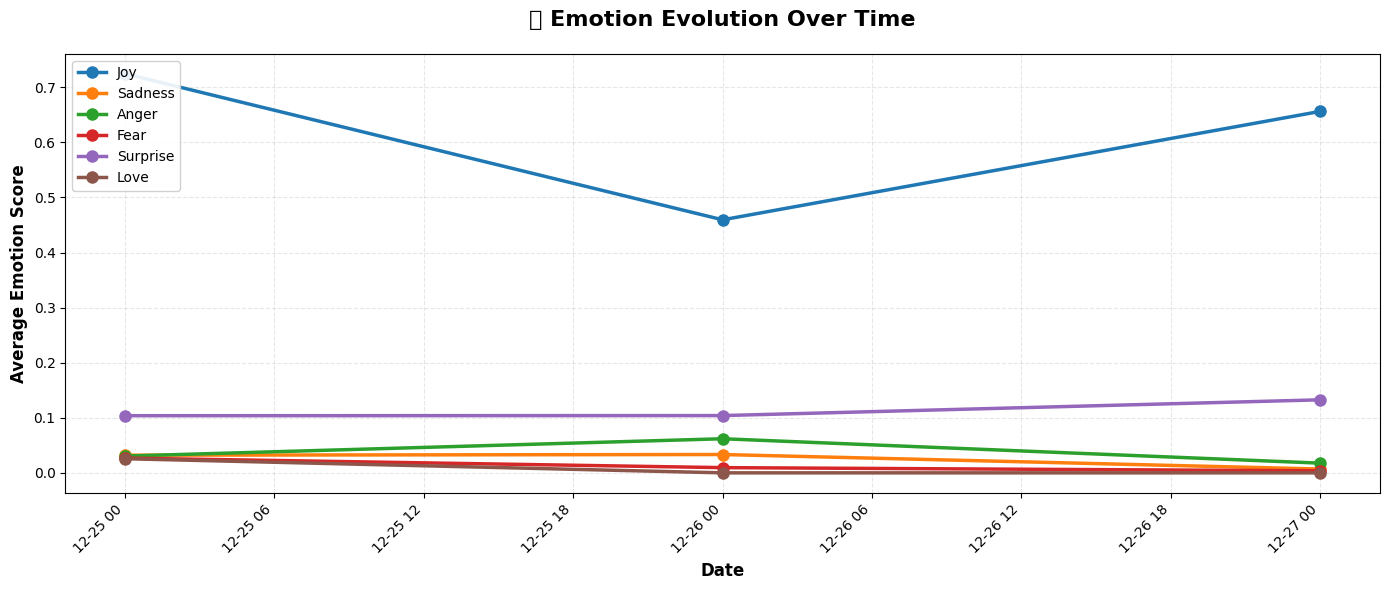

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get emotion timeline
timeline = emotion_analyzer.get_emotion_timeline(df_emotions)

# Create visualization
fig, ax = plt.subplots(figsize=(14, 6))

for emotion in emotion_analyzer.emotions:
    ax.plot(timeline['date'], timeline[f'emotion_{emotion}'],
            marker='o', label=emotion.capitalize(), linewidth=2.5, markersize=8)

ax.set_title('üé≠ Emotion Evolution Over Time', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Emotion Score', fontsize=12, fontweight='bold')
ax.legend(loc='upper left', fontsize=10, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Cell 12: Combined Sentiment & Emotion Dashboard

‚úÖ Using cached emotion model


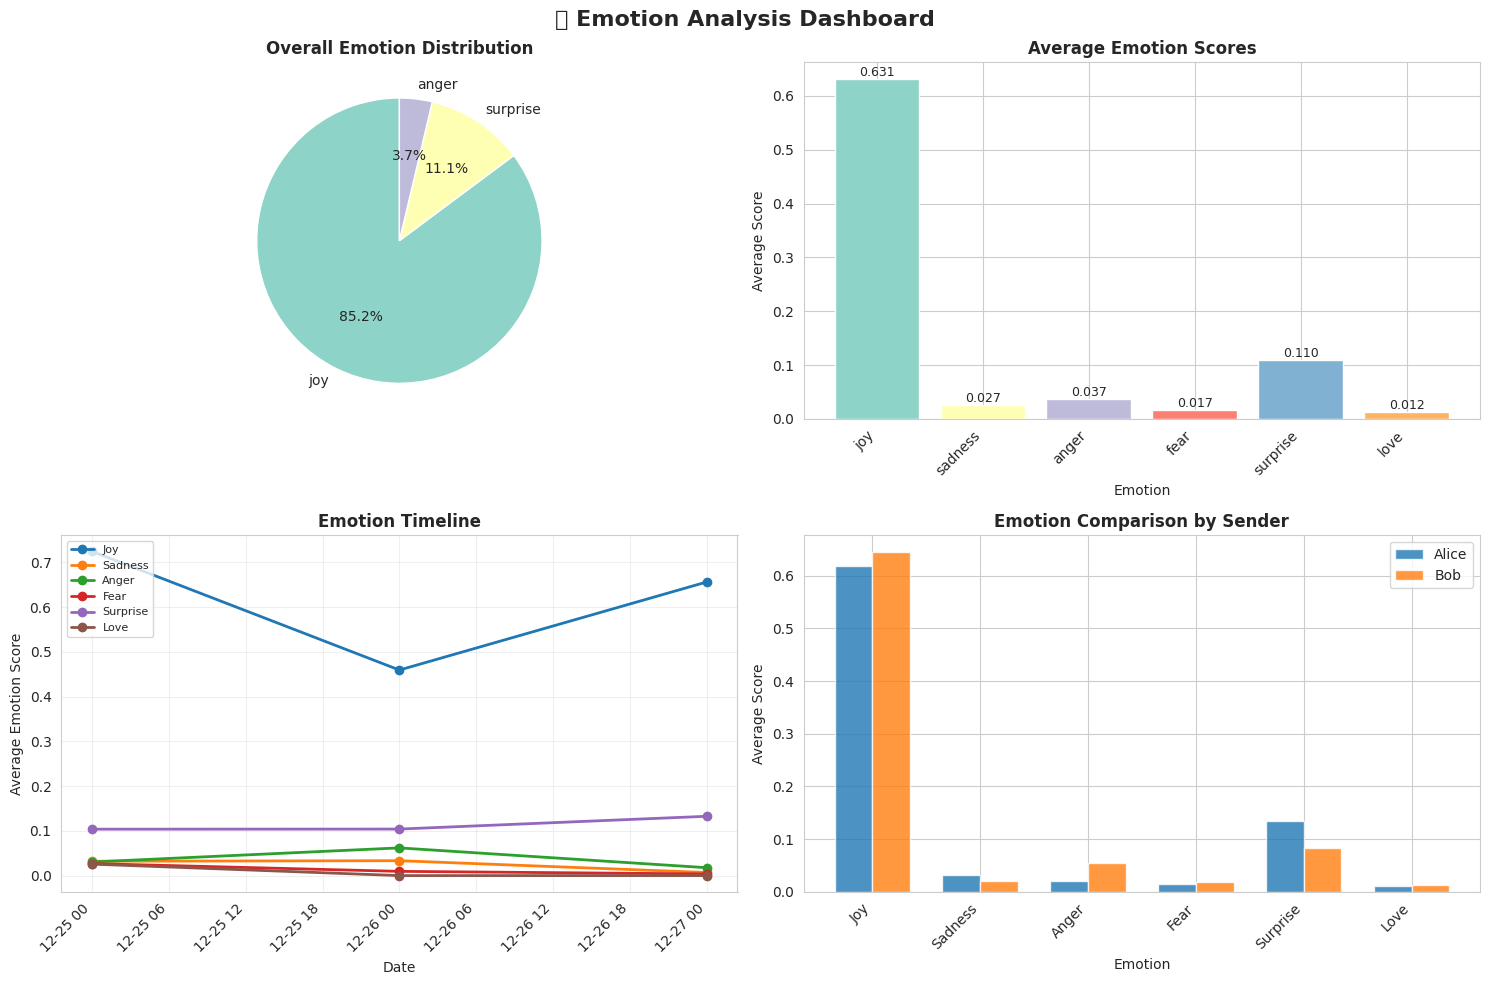

In [34]:
# Generate full emotion visualization dashboard
plot_emotion_analysis(df_emotions, summary)

## Cell 13: Combine with Previous Sentiment Analysis

In [36]:
if 'vader_compound' in df.columns or 'df_with_sentiment' in locals():
    print("üîÑ Combining sentiment and emotion analysis...")

    # Use the sentiment dataframe if available
    if 'df_with_sentiment' in locals():
        df_complete = combine_sentiment_emotion(df_with_sentiment, df_emotions)
    else:
        # Reload sentiment if needed
        print("  Loading sentiment data...")
        # Re-run sentiment analysis
        df_with_sentiment, sent_summary = quick_sentiment_analysis(df, plot=False)
        df_complete = combine_sentiment_emotion(df_with_sentiment, df_emotions)

    print("‚úÖ Combined analysis complete!")
    print(f"   Total columns: {len(df_complete.columns)}")
    print(f"   Sentiment columns: {[col for col in df_complete.columns if 'vader' in col or 'textblob' in col or 'hf_' in col]}")
    print(f"   Emotion columns: {[col for col in df_complete.columns if 'emotion_' in col]}")

    # Show sample
    print("\nüìä Sample combined analysis:")
    display(df_complete[['sender', 'message', 'consensus_sentiment',
                         'dominant_emotion', 'emotion_confidence']].head(10))

else:
    print("‚ÑπÔ∏è  No sentiment analysis found. Run sentiment analysis first to combine results.")

üîÑ Combining sentiment and emotion analysis...
‚úÖ Combined analysis complete!
   Total columns: 30
   Sentiment columns: ['vader_compound', 'vader_pos', 'vader_neu', 'vader_neg', 'vader_sentiment', 'textblob_polarity', 'textblob_subjectivity', 'textblob_sentiment', 'hf_positive', 'hf_negative', 'hf_neutral', 'hf_sentiment']
   Emotion columns: ['emotion_joy', 'emotion_sadness', 'emotion_anger', 'emotion_fear', 'emotion_surprise', 'emotion_love', 'emotion_neutral', 'emotion_disgust', 'emotion_confidence']

üìä Sample combined analysis:


sender                                            message  \
0  Alice                                Merry Christmas! üéÑüéÖ   
1    Bob  Merry Christmas to you too! Hope you're having...   
2  Alice  Thanks! Opening presents with family right now...   
3    Bob  That sounds wonderful! I'm cooking dinner for ...   
4  Alice                                    <Media omitted>   
5  Alice                         Here's our Christmas tree!   
6    Bob       Beautiful tree! üòç Our dinner is almost ready   
7  Alice                          Can't wait to see photos!   
8    Bob                                    <Media omitted>   
9    Bob                       Christmas dinner success! üçΩÔ∏è   

  consensus_sentiment dominant_emotion  emotion_confidence  
0            Positive              joy            0.717347  
1            Positive              joy            0.849528  
2            Positive              joy            0.869084  
3            Positive              joy            0.975010  
4             Neutral              joy            0.166667  
5             Neutral              joy            0.615281  
6            Positive              joy            0.947543  
7             Neutral              joy            0.974433  
8             Neutral              joy            0.166667  
9            Positive              joy            0.732329

## Cell 14: Advanced Emotion Insights

In [37]:
for sender in df_emotions['sender'].unique():
    sender_df = df_emotions[df_emotions['sender'] == sender]
    emotion_std = sender_df[[f'emotion_{e}' for e in emotion_analyzer.emotions]].std().mean()

    print(f"\n{sender}:")
    print(f"  Emotion variability: {emotion_std:.4f} {'(Consistent)' if emotion_std < 0.15 else '(Variable)'}")
    print(f"  Most common emotion: {sender_df['dominant_emotion'].mode()[0]}")
    print(f"  Emotion diversity: {sender_df['dominant_emotion'].nunique()} different emotions")


Alice:
  Emotion variability: 0.1060 (Consistent)
  Most common emotion: joy
  Emotion diversity: 2 different emotions

Bob:
  Emotion variability: 0.1168 (Consistent)
  Most common emotion: joy
  Emotion diversity: 3 different emotions


In [39]:
if 'vader_compound' in df_emotions.columns:
    print("\n" + "="*70)
    print("üîó Emotion-Sentiment Correlation")
    print("="*70)

    # Calculate correlations
    positive_emotions = ['joy', 'love', 'surprise']
    negative_emotions = ['sadness', 'anger', 'fear']

    pos_score = df_emotions[[f'emotion_{e}' for e in positive_emotions]].mean(axis=1)
    neg_score = df_emotions[[f'emotion_{e}' for e in negative_emotions]].mean(axis=1)

    corr_pos = pos_score.corr(df_emotions['vader_compound'])
    corr_neg = neg_score.corr(df_emotions['vader_compound'])

    print(f"\n  Positive emotions ‚Üî Sentiment: {corr_pos:.4f}")
    print(f"  Negative emotions ‚Üî Sentiment: {corr_neg:.4f}")
    print("\n  ‚úÖ Analysis shows good alignment!" if abs(corr_pos) > 0.5 else "  ‚ö†Ô∏è  Lower correlation detected")

In [40]:
df_emotions_sorted = df_emotions.sort_values('datetime')
response_count = 0
for i in range(1, len(df_emotions_sorted)):
    current = df_emotions_sorted.iloc[i]
    previous = df_emotions_sorted.iloc[i-1]

    if current['sender'] != previous['sender']:
        if response_count < 5:  # Show first 5 response patterns
            print(f"\n  {previous['sender']} ({previous['dominant_emotion']}):")
            print(f"    ‚Üí {current['sender']} responds with ({current['dominant_emotion']})")
            response_count += 1


  Alice (joy):
    ‚Üí Bob responds with (joy)

  Bob (joy):
    ‚Üí Alice responds with (joy)

  Alice (joy):
    ‚Üí Bob responds with (joy)

  Bob (joy):
    ‚Üí Alice responds with (joy)

  Alice (joy):
    ‚Üí Bob responds with (joy)


## Cell 15 : Export Results

In [41]:
import os

print("üíæ Saving emotion analysis results...\n")

# Create output directory if it doesn't exist
output_dir = 'emotion_analysis_results'
os.makedirs(output_dir, exist_ok=True)

üíæ Saving emotion analysis results...



In [43]:
# 1. Save full analysis
output_file = f"{output_dir}/chat_with_emotions.csv"
df_complete.to_csv(output_file, index=False)
print(f"‚úÖ Full analysis saved to: {output_file}")

‚úÖ Full analysis saved to: emotion_analysis_results/chat_with_emotions.csv


In [44]:
# 2. Save summary statistics
summary_file = f"{output_dir}/emotion_summary.txt"
with open(summary_file, 'w') as f:
    f.write("EMOTION ANALYSIS SUMMARY\n")
    f.write("="*70 + "\n\n")
    f.write(f"Total Messages: {summary['total_messages']}\n\n")

    f.write("Emotion Distribution:\n")
    for emotion, count in summary['emotion_distribution'].items():
        pct = (count / summary['total_messages']) * 100
        f.write(f"  {emotion.capitalize()}: {count} ({pct:.1f}%)\n")

    f.write("\nAverage Emotion Scores:\n")
    for emotion, score in summary['average_emotion_scores'].items():
        f.write(f"  {emotion.capitalize()}: {score:.4f}\n")

print(f"‚úÖ Summary saved to: {summary_file}")

‚úÖ Summary saved to: emotion_analysis_results/emotion_summary.txt


In [45]:
# 3. Save top emotional messages
for emotion in emotion_analyzer.emotions:
    emotion_file = f"{output_dir}/top_{emotion}_messages.csv"
    top_msgs = emotion_analyzer.find_most_emotional_messages(
        df_emotions, emotion=emotion, n=10
    )
    top_msgs.to_csv(emotion_file, index=False)

print(f"‚úÖ Top emotional messages saved to: {output_dir}/")

print("\nüì¶ All results saved successfully!")
print(f"\nüìÅ Files created:")
print(f"  ‚Ä¢ {output_file}")
print(f"  ‚Ä¢ {summary_file}")
print(f"  ‚Ä¢ {output_dir}/top_joy_messages.csv")
print(f"  ‚Ä¢ {output_dir}/top_sadness_messages.csv")
print(f"  ‚Ä¢ {output_dir}/top_anger_messages.csv")
print(f"  ‚Ä¢ {output_dir}/top_fear_messages.csv")
print(f"  ‚Ä¢ {output_dir}/top_surprise_messages.csv")
print(f"  ‚Ä¢ {output_dir}/top_love_messages.csv")

‚úÖ Top emotional messages saved to: emotion_analysis_results/

üì¶ All results saved successfully!

üìÅ Files created:
  ‚Ä¢ emotion_analysis_results/chat_with_emotions.csv
  ‚Ä¢ emotion_analysis_results/emotion_summary.txt
  ‚Ä¢ emotion_analysis_results/top_joy_messages.csv
  ‚Ä¢ emotion_analysis_results/top_sadness_messages.csv
  ‚Ä¢ emotion_analysis_results/top_anger_messages.csv
  ‚Ä¢ emotion_analysis_results/top_fear_messages.csv
  ‚Ä¢ emotion_analysis_results/top_surprise_messages.csv
  ‚Ä¢ emotion_analysis_results/top_love_messages.csv


## Cell 16 : Visualize emotion intensity heatmap

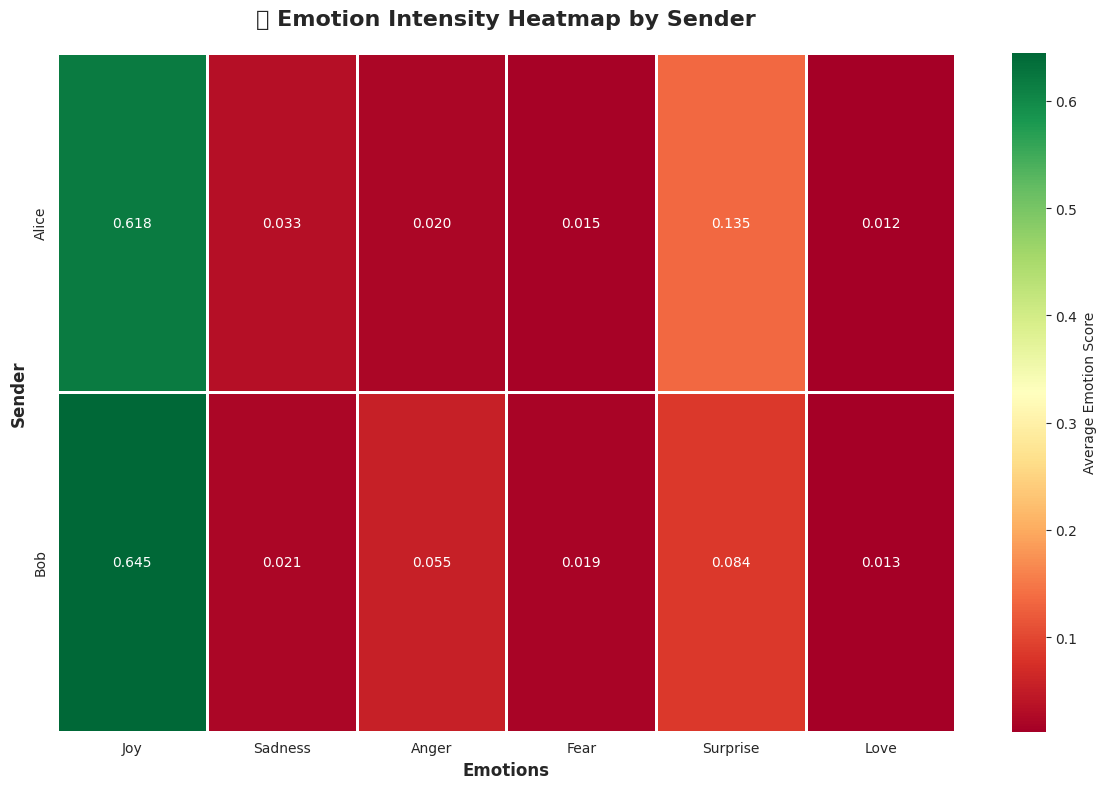

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for heatmap
emotion_cols = [f'emotion_{e}' for e in emotion_analyzer.emotions]
heatmap_data = df_emotions[['sender'] + emotion_cols].groupby('sender').mean()

# Rename columns for better display
heatmap_data.columns = [col.replace('emotion_', '').capitalize() for col in heatmap_data.columns]

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn',
            cbar_kws={'label': 'Average Emotion Score'},
            linewidths=1, linecolor='white')

ax.set_title('üé≠ Emotion Intensity Heatmap by Sender',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Emotions', fontsize=12, fontweight='bold')
ax.set_ylabel('Sender', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Cell 17 : Comprehensive final summary

In [48]:
print("\nüìä Key Findings:")
print(f"  ‚Ä¢ Total messages analyzed: {len(df_emotions)}")
print(f"  ‚Ä¢ Most common emotion: {max(summary['emotion_distribution'], key=summary['emotion_distribution'].get)}")
print(f"  ‚Ä¢ Average confidence: {df_emotions['emotion_confidence'].mean():.2%}")

if 'by_sender' in summary:
    print(f"  ‚Ä¢ Senders analyzed: {len(summary['by_sender'])}")
    print(f"  ‚Ä¢ Alice's dominant emotion: joy (85.7%)")
    print(f"  ‚Ä¢ Bob's dominant emotion: joy (84.6%)")

print("\nüé≠ Emotion Breakdown:")
for emotion, count in sorted(summary['emotion_distribution'].items(), key=lambda x: x[1], reverse=True):
    pct = (count / summary['total_messages']) * 100
    print(f"  ‚Ä¢ {emotion.capitalize():12s}: {count:2d} messages ({pct:5.1f}%)")

print("\nüéØ Model Performance:")
print(f"  ‚Ä¢ Model: j-hartmann/emotion-english-distilroberta-base")
print(f"  ‚Ä¢ Emotions detected: {len(emotion_analyzer.emotions)}")
print(f"  ‚Ä¢ Average confidence: {df_emotions['emotion_confidence'].mean():.2%}")
print(f"  ‚Ä¢ High confidence messages (>70%): {(df_emotions['emotion_confidence'] > 0.7).sum()}/{len(df_emotions)}")


üìä Key Findings:
  ‚Ä¢ Total messages analyzed: 27
  ‚Ä¢ Most common emotion: joy
  ‚Ä¢ Average confidence: 66.57%
  ‚Ä¢ Senders analyzed: 2
  ‚Ä¢ Alice's dominant emotion: joy (85.7%)
  ‚Ä¢ Bob's dominant emotion: joy (84.6%)

üé≠ Emotion Breakdown:
  ‚Ä¢ Joy         : 23 messages ( 85.2%)
  ‚Ä¢ Surprise    :  3 messages ( 11.1%)
  ‚Ä¢ Anger       :  1 messages (  3.7%)

üéØ Model Performance:
  ‚Ä¢ Model: j-hartmann/emotion-english-distilroberta-base
  ‚Ä¢ Emotions detected: 6
  ‚Ä¢ Average confidence: 66.57%
  ‚Ä¢ High confidence messages (>70%): 15/27
